
# Clustering: Application to Fashion MNIST

In this example, we will use two clustering techniques to explore a unknown dataset: Fashion MNIST. 

The idea is to consider the Fashion MNIST dataset and to classify its content in an unsupervised manner. The resulting clusters are then compared to the 10 known classes of datatset. 


In [19]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import normalize 
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("fashion-mnist_test.csv")
X = df.iloc[:, 1:] # The Original matrix. Each row is an 28x28 gray-level image.
y = df.iloc[:, :1] # The class of the image.

## A quick look to the dataset

The full description of this datset is available following the URL:
https://research.zalando.com/welcome/mission/research-projects/fashion-mnist/


The number of images = 10000
The number of classes = 10


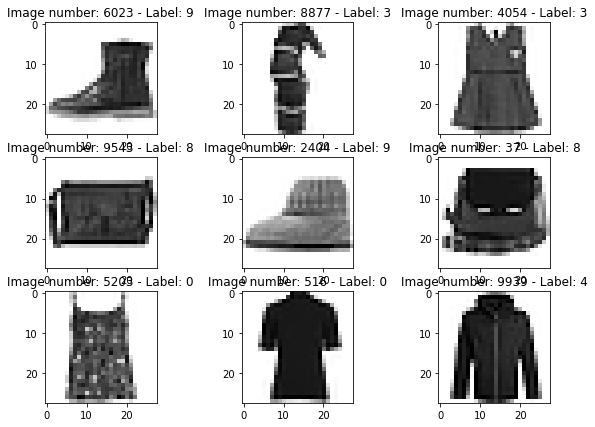

In [20]:
from matplotlib import pyplot as plt

Xn = X.values 
yn = y.values 

number_images = Xn.shape[0]
number_classes = np.unique(yn).size # Other solution : yn.max()+1

print('The number of images = {}'.format(number_images))
print('The number of classes = {}'.format(number_classes))

j = 1
fig = plt.figure()
fig.set_figheight(7)
fig.set_figwidth(10)
for i in range(9):
    cur = np.random.randint(number_images)
    fig.add_subplot(3,3,j)
    plt.imshow(Xn[cur].reshape(28,28), cmap='gray_r', interpolation='nearest')
    plt.title('Image number: {} - Label: {}'.format(cur, yn[cur,0]))
    #plt.colorbar()                                         
    j=j+1

plt.show()



## Preprocessing the dataset using PCA 

Now that we know very well PCA and it's ability to reduce the dimension of the data while preserving most of the information, we first pre-process the dataset so that we get rid of useless dimensions.

Work to do :
- Apply PCA on data stored in X and keep 90% of expressed variance.
- Transform the data X using the computed PCA and store the result in X_r.
- Print the original dimension of the dataset.
- Print the dimension of the dataset after PCA.

The result of applying PCA on Fashion MNIST : Each principal component is a apotentially interpretable picture of what each vector is finding.


Work to do :
- For each of the 4 first components, print the corresponding "explained variance ratio". 
- Comment the pictures.

Original dimension of the dataset (before PCA)  =  (10000, 784)
Number of dimensions after PCA (0.90) =  (10000, 82)


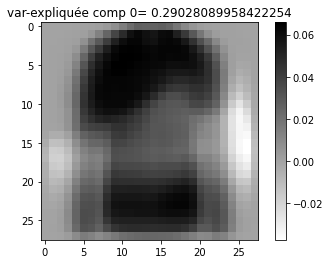

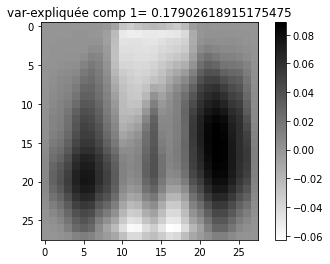

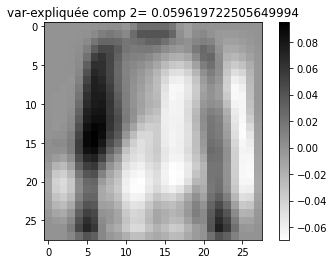

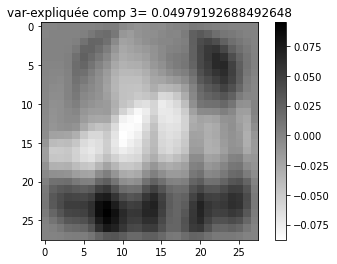

In [4]:
from sklearn.decomposition import PCA

pca = PCA(0.90)
Xn_r = pca.fit(Xn).transform(Xn)

print("Original dimension of the dataset (before PCA)  = ", Xn.shape )
print("Number of dimensions after PCA (0.90) = ", Xn_r.shape)
      
# COMPLETE THE CODE HERE...
for i in range (4):
    plt.title("var-expliquée comp {}= {}" .format(i,pca.explained_variance_ratio_[i]))
    plt.imshow(pca.components_[i].reshape(28,28), cmap='gray_r', interpolation='nearest')
    plt.colorbar()
    plt.show()


## K-Means

Let's first apply k-means on the PCA transformed vectors of the dataset.
The target number of k-means centroids = 1000.

Print the number of obtained clusters and store this value in "nb_clusts".

Use for that: The package "sklearn.cluster" (from sklearn.cluster import KMeans)

In [5]:
import time
from sklearn.cluster import KMeans
start_time = time.process_time()
target_nb_clusts = 1000
# COMPLETE THE CODE HERE...
k_means = KMeans(target_nb_clusts)
k_means.fit(Xn_r)

nb_clusts = k_means.cluster_centers_.shape[0]
# nb_clusts1 = k_means.cluster_centers_.shape[1]

print("The numbers of k-means resulting clusters is ", nb_clusts)
execution_time = time.process_time() - start_time
print(f'duration: {execution_time} seconds')

The numbers of k-means resulting clusters is  1000
duration: 103.58947114099999 seconds


### Before going further, let's study the properties of our clusters

The first thing to do is to create **nb_clusts** lists named **cluster_index**, where:
- **cluster_index[i]** contains the indices from **X** of vectors that belong to cluster # **i**.

In [6]:
#2D matrix  for an array of indexes of the given label
cluster_index= [[] for j in range(nb_clusts)]
y=0
for i in range(Xn_r.shape[0]):
    for j in range(nb_clusts):
        if k_means.labels_[i] == j:
            cluster_index[j].append(i)
print("The list of the 1000 Cluster is :") 
x = np.array(cluster_index)
for i in range(x.shape[0]):
  print("the",i,"cluster has ",len(x[i]),"entities")
  y+=len(x[i])
print("sum of entities is", y)

The list of the 1000 Cluster is :
the 0 cluster has  2 entities
the 1 cluster has  16 entities
the 2 cluster has  8 entities
the 3 cluster has  10 entities
the 4 cluster has  3 entities
the 5 cluster has  6 entities
the 6 cluster has  17 entities
the 7 cluster has  18 entities
the 8 cluster has  18 entities
the 9 cluster has  9 entities
the 10 cluster has  4 entities
the 11 cluster has  14 entities
the 12 cluster has  2 entities
the 13 cluster has  15 entities
the 14 cluster has  16 entities
the 15 cluster has  12 entities
the 16 cluster has  18 entities
the 17 cluster has  4 entities
the 18 cluster has  10 entities
the 19 cluster has  10 entities
the 20 cluster has  5 entities
the 21 cluster has  12 entities
the 22 cluster has  9 entities
the 23 cluster has  11 entities
the 24 cluster has  3 entities
the 25 cluster has  17 entities
the 26 cluster has  17 entities
the 27 cluster has  10 entities
the 28 cluster has  11 entities
the 29 cluster has  5 entities
the 30 cluster has  16 entit

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  if __name__ == '__main__':


 entities
the 256 cluster has  10 entities
the 257 cluster has  4 entities
the 258 cluster has  7 entities
the 259 cluster has  8 entities
the 260 cluster has  1 entities
the 261 cluster has  15 entities
the 262 cluster has  9 entities
the 263 cluster has  13 entities
the 264 cluster has  21 entities
the 265 cluster has  9 entities
the 266 cluster has  25 entities
the 267 cluster has  12 entities
the 268 cluster has  18 entities
the 269 cluster has  23 entities
the 270 cluster has  14 entities
the 271 cluster has  4 entities
the 272 cluster has  2 entities
the 273 cluster has  13 entities
the 274 cluster has  7 entities
the 275 cluster has  20 entities
the 276 cluster has  10 entities
the 277 cluster has  16 entities
the 278 cluster has  12 entities
the 279 cluster has  11 entities
the 280 cluster has  16 entities
the 281 cluster has  17 entities
the 282 cluster has  6 entities
the 283 cluster has  14 entities
the 284 cluster has  6 entities
the 285 cluster has  6 entities
the 286 clus

In order to assess the quality of produced clusters, here we will visualize the content of few clusters. 

<Figure size 720x504 with 0 Axes>

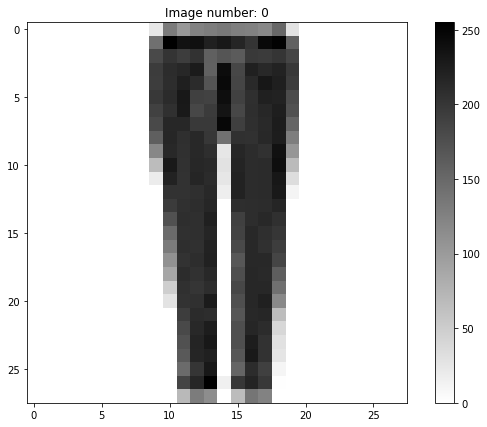

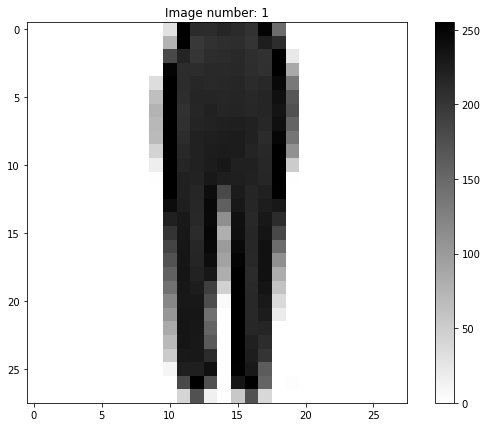

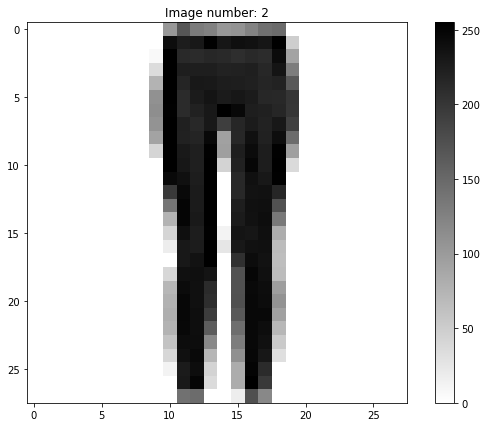

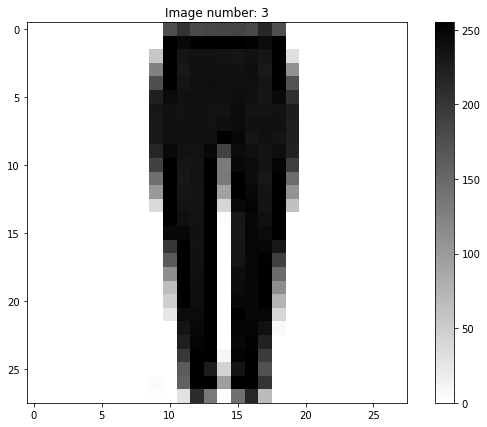

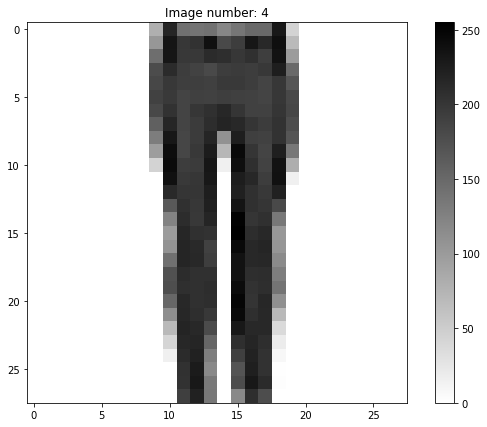

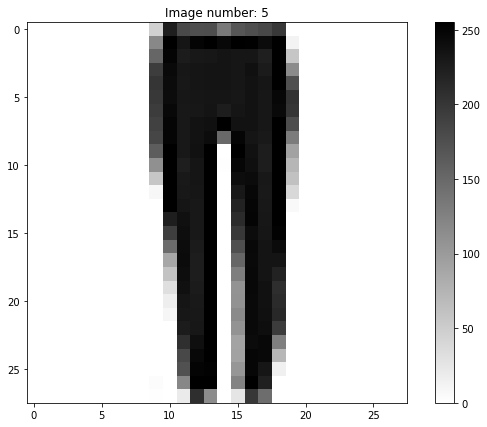

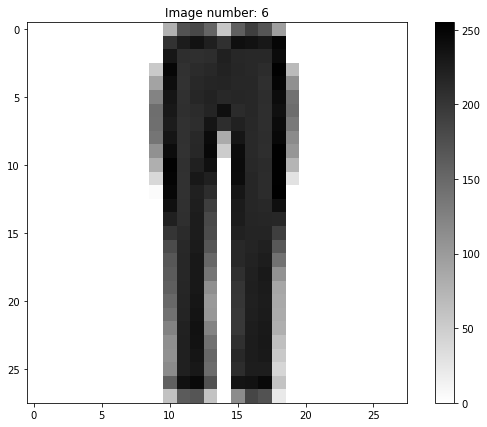

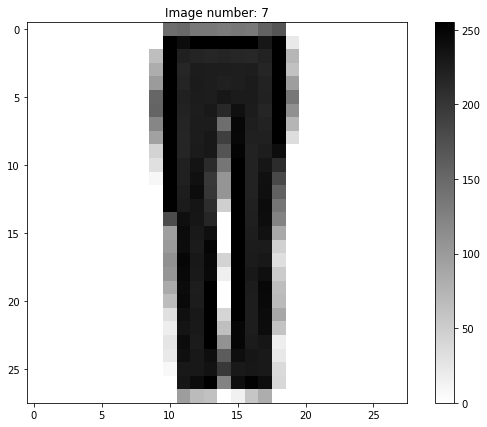

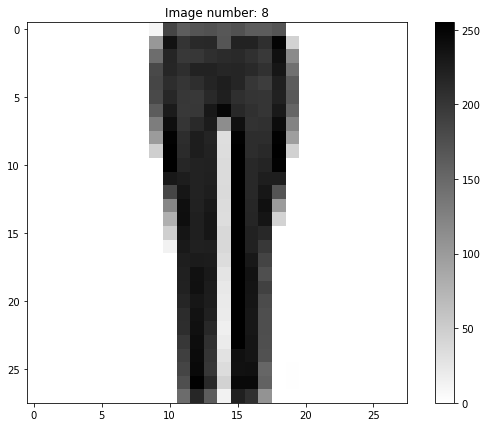

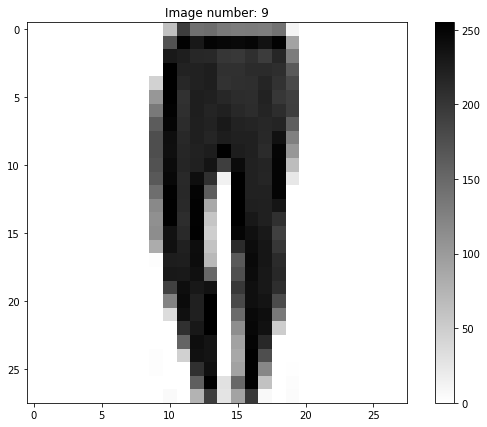

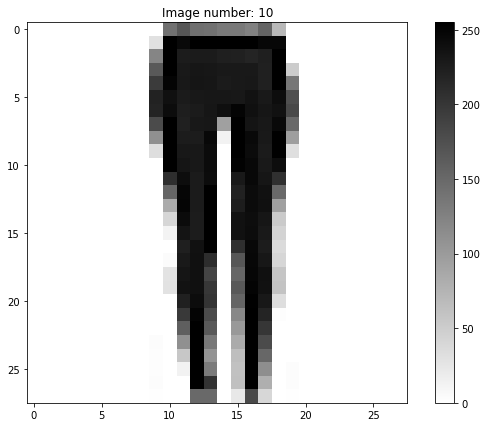

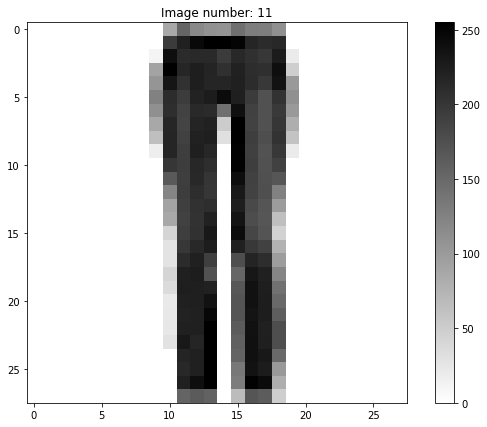

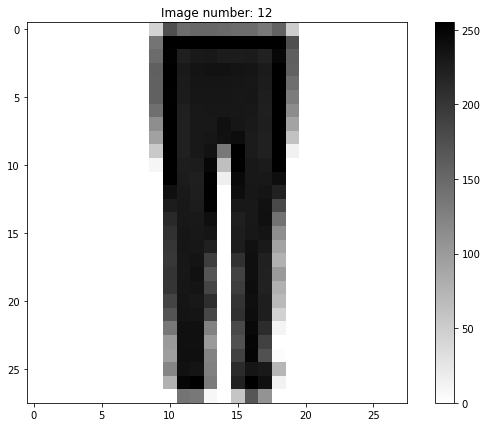

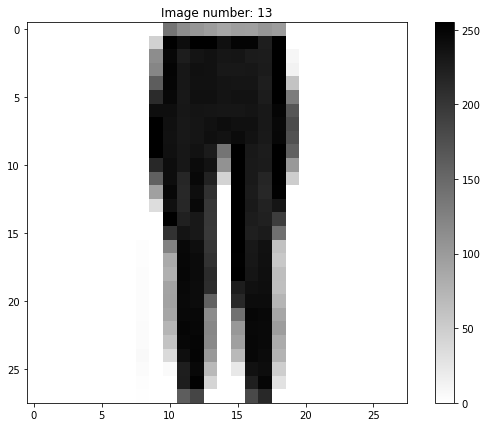

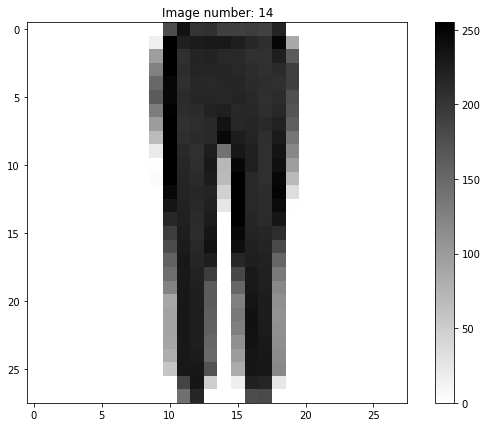

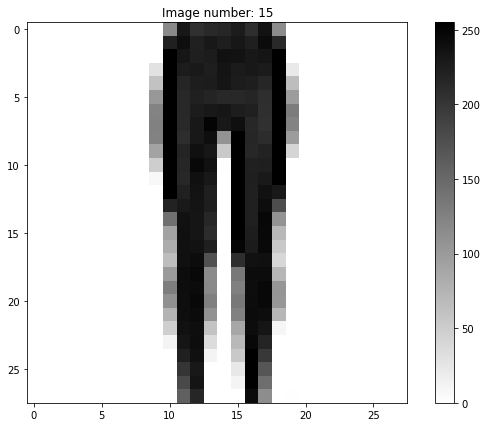

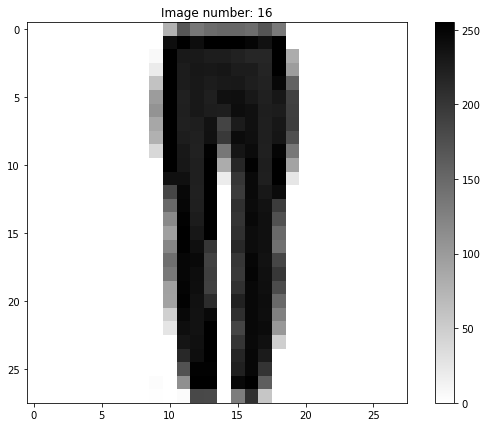

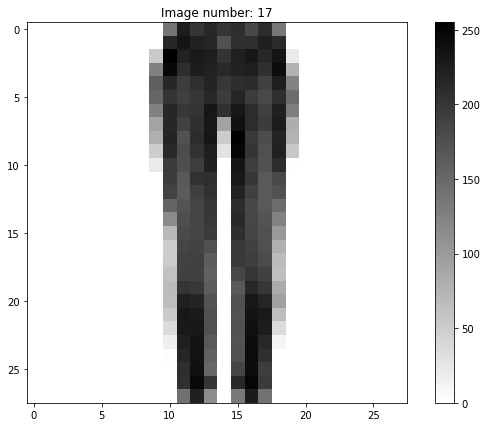

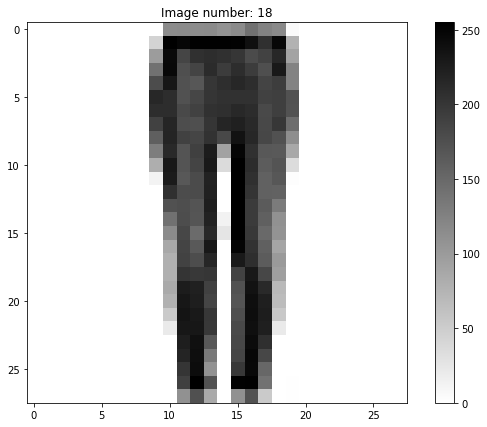

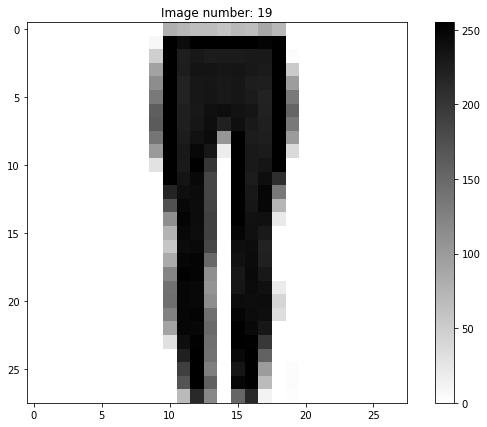

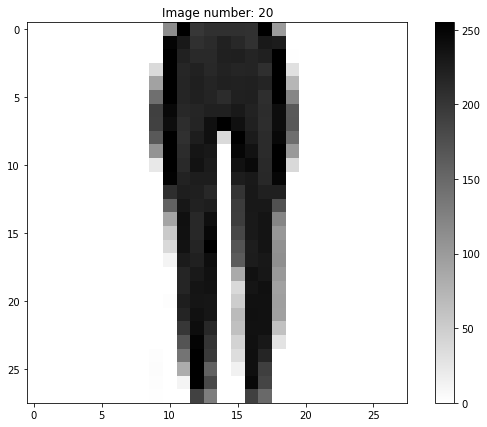

In [7]:

fig = plt.figure();
fig.set_figheight(7)
fig.set_figwidth(10)
clust0 = 1
clust1 = 2 # ID of cluster to visualize
clust2 = 3 # ID of cluster to visualize
clust3 = 935 # ID of cluster to visualize
img = 0
clusterI = cluster_index[clust3]
for i in clusterI:
    fig = plt.figure();
    fig.set_figheight(7)
    fig.set_figwidth(10)
    plt.imshow(Xn[i].reshape(28,28), cmap='gray_r', interpolation='nearest')
    plt.colorbar()       
    plt.title('Image number: {}'.format(img))      # affichage de l'indice de l'image dans le cluster                             
    plt.show()
    img = img+1


plt.show()

We can even plot the histogram of the class labels of vectors contained in the cluster.

[3. 3. 3. 3. 3. 3. 3. 4.]
[6. 2. 6. 6. 4. 4. 6. 8. 4. 4.]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


([<matplotlib.axis.XTick at 0x7f95b68c9ad0>,
 [Text(0, 0, 'Tshirt'),
  Text(0, 0, 'Trouser'),
  Text(0, 0, 'Pullover'),
  Text(0, 0, 'Dress'),
  Text(0, 0, 'Coat'),
  Text(0, 0, 'Sandals'),
  Text(0, 0, 'Shirt'),
  Text(0, 0, 'Sneaker'),
  Text(0, 0, 'Bag'),
  Text(0, 0, 'Boots')])

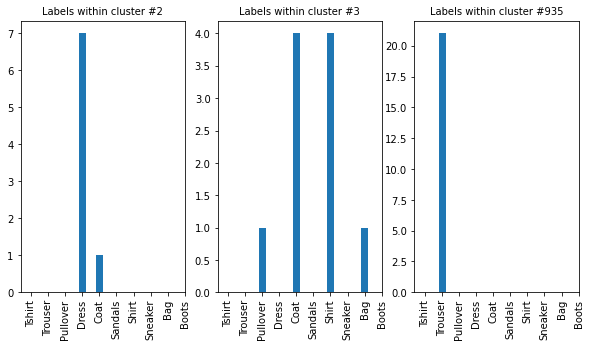

In [8]:

class_names = {0:'T-shirt/top', 1:'Trouser',2: 'Pullover',3: 'Dress',4: 'Coat',5:
               'Sandal',6: 'Shirt', 7:'Sneaker',8:  'Bag',9: 'Ankle boot'}
# Create and fill an array "clusterL" with the labels of images belonging to a cluster 
clusterL1 = []
for i in range (len(cluster_index[clust1])):
    clusterL1.append(np.linalg.norm(yn[cluster_index[clust1][i]]))  # placer dans un vecteur les classes des images contenu dans le cluster
clusterL2 = []
for i in range (len(cluster_index[clust2])):
    clusterL2.append(np.linalg.norm(yn[cluster_index[clust2][i]]))  # placer dans un vecteur les classes des images contenu dans le cluster
clusterL3 = []
for i in range (len(cluster_index[clust3])):
    clusterL3.append(np.linalg.norm(yn[cluster_index[clust3][i]]))  # placer dans un vecteur les classes des images contenu dans le cluster
print(np.array(clusterL1))
print(np.array(clusterL2))
print(np.array(clusterL3))
plt.figure(figsize=(10,5))
plt.subplot(131),plt.hist(clusterL1, bins=range(10), rwidth=0.4, align='left'),plt.title('Labels within cluster #{}'.format('2'), fontsize=10)
plt.xticks(np.arange(0, 9, step=0.2), rotation='vertical')  # Set label locations.
plt.xticks(np.arange(10), ['Tshirt', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandals', 'Shirt', 'Sneaker', 'Bag', 'Boots'])  # Set text labels.
plt.subplot(132),plt.hist(clusterL2, bins=range(10), rwidth=0.4, align='left'),plt.title('Labels within cluster #{}'.format('3'), fontsize=10)
plt.xticks(np.arange(0, 9, step=0.2), rotation='vertical')  # Set label locations.
plt.xticks(np.arange(10), ['Tshirt', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandals', 'Shirt', 'Sneaker', 'Bag', 'Boots'])  # Set text labels.
plt.subplot(133),plt.hist(clusterL3, bins=range(10), rwidth=0.4, align='left'),plt.title('Labels within cluster #{}'.format('935'), fontsize=10)
plt.xticks(np.arange(0, 9, step=0.2), rotation='vertical')  # Set label locations.
plt.xticks(np.arange(10), ['Tshirt', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandals', 'Shirt', 'Sneaker', 'Bag', 'Boots'])  # Set text labels.

## Further experiments:
#### - Perform the clustering using a value of k equals to the number of classes in the dataset, i.e. k = 10. What do you notice?

#### - Perform again the clustering (k=1000) without the preprocessing step using PCA, i.e. without any dimensionality reduction? Analyse the result and compare it to the result with PCA.

#### - If you perform two different clustering (varying internal parameters: k, with/without PCA...), how can you compare the quality of the resulting clusters? Try to propose and to implement objective measures for that.

...

# Hierarchical clustering

Clusters from k-means seems to be of good quality, that is vectors within each cluster are mostly from the same class, if we consider the groud-truth (true classes) of images in the dataset.

However, 1000 clusters is too much, especially if we know that the dataset is actually composed of images from 10 classes.

One way to group k-means clusters in order to have clusters that are as close as possible to the classes of our dataset is to use hierarchical clustering.

One can say, we could have used hierarchical clustering from the begining. The answer to this question is related to the complexity of the hierarchical clustering algorithm.

The proposed approach here is to apply hierarchical clustering over the k-means centroids.

Let's start...

- Apply the hieararchical clustering over k-means centroids (the ward criteria has to be used).
- Plot the resulting dendrogram.


You can use "dendrogram", "linkage", "fcluster" from "scipy.cluster.hierarchy".
Needed functions: "linkage" and "dendrogram".

# Hierarchical on Kmeans+pca

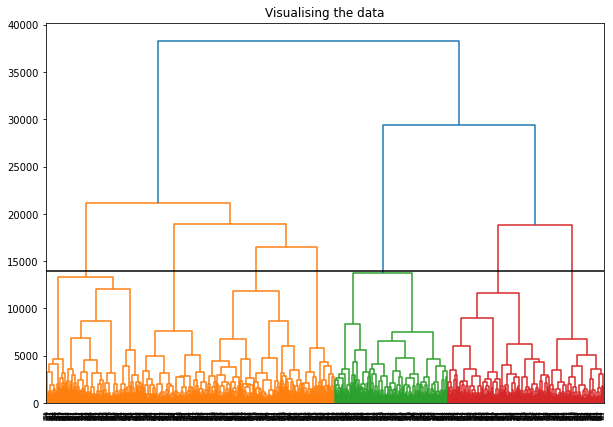

In [9]:
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
centroids_after_kmeans = k_means.cluster_centers_
max_d = 14000
# COMPLETE THE CODE HERE...
plt.figure(figsize=(10, 7))
plt.title("Visualising the data")
Dendrogram = sch.dendrogram((sch.linkage(centroids_after_kmeans, method ='ward',optimal_ordering=True)))
plt.axhline(y=max_d, c='k')

### Comparing performances :
in order to that we use the silhouette score to determine how Separated are the clusters !


In [ ]:
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics import silhouette_score
silhouette_scores = [] 

for n_cluster in range(2, 11):
    silhouette_scores.append( 
        silhouette_score(Xn_r, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(Xn_r))) 
    
# Plotting a bar graph to compare the results 
k = [2, 3, 4, 5, 6,7,8,9,10] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

##### We can see that when the number of clusters is 2, the score is 0.2 which is not good at all, because at first we have 1000 Sample ! and pca on it

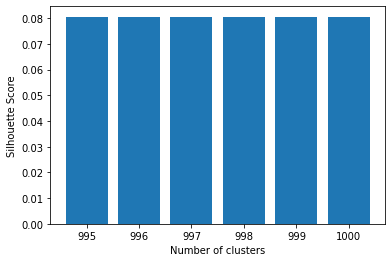

In [11]:
silhouette_scores = [] 

for n_cluster in range(995, 1001):
    silhouette_scores.append( 
        silhouette_score(Xn_r, AgglomerativeClustering(n_clusters = n_cluster).fit_predict(Xn_r))) 
    
# Plotting a bar graph to compare the results 
k = [995,996, 997, 998, 999, 1000] 
plt.bar(k, silhouette_scores) 
plt.xlabel('Number of clusters', fontsize = 10) 
plt.ylabel('Silhouette Score', fontsize = 10) 
plt.show() 

While here for higher number of clusters ! show low values of how separated are the clusters

In [12]:
agg = AgglomerativeClustering(n_clusters=3)
agg.fit(Xn_r)

AgglomerativeClustering(n_clusters=3)

In [13]:
X_principal = pd.DataFrame(Xn_r) 
X_principal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 82 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       10000 non-null  float64
 1   1       10000 non-null  float64
 2   2       10000 non-null  float64
 3   3       10000 non-null  float64
 4   4       10000 non-null  float64
 5   5       10000 non-null  float64
 6   6       10000 non-null  float64
 7   7       10000 non-null  float64
 8   8       10000 non-null  float64
 9   9       10000 non-null  float64
 10  10      10000 non-null  float64
 11  11      10000 non-null  float64
 12  12      10000 non-null  float64
 13  13      10000 non-null  float64
 14  14      10000 non-null  float64
 15  15      10000 non-null  float64
 16  16      10000 non-null  float64
 17  17      10000 non-null  float64
 18  18      10000 non-null  float64
 19  19      10000 non-null  float64
 20  20      10000 non-null  float64
 21  21      10000 non-null  float64
 22 

/usr/local/lib/python3.7/dist-packages/matplotlib/collections.py:885: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


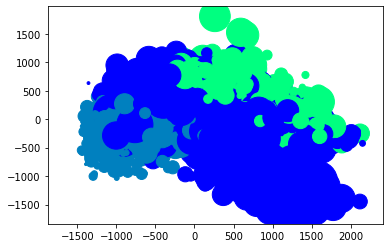

In [14]:
# Visualizing the clustering 
plt.scatter(X_principal[1], X_principal[2], X_principal[3],
           c = AgglomerativeClustering(n_clusters = 3).fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

We can see that for the 3 first comonents are dispersed in the area

From the dendrogram:
- Select 10 clusters.
- Store the obtained clusters in **final_clusters**
- Create an array of lists named **clustLL**, where:
    - **clustLL[i]** contains the indices from **X** of vectors that belong to cluster # **i**.
    
## TO DO

Extract "final_clusters" using function "fcluster".

In [15]:
final_clusters = sch.fcluster(sch.linkage(centroids_after_kmeans, method='ward'),t=10, criterion='maxclust') # selection de 10 clusters
print(final_clusters.shape[0])
clustLL=[[] for j in range(10)]
for j in range(10):
    for i in range(final_clusters.shape[0]):
        if (final_clusters[i]-1==j):
            clustLL[j].extend(cluster_index[i])
print(len(clustLL))

1000
10


- We apply on the k = 1000 centroids of the k clusters form after havinge apply the algorithm of the k-means.
- This hierarchical partition is of the AGGLOMERATIVE type because it initially considers each centroids as a cluster.
- The following dendrogram shows the hierarchical relationship following a dispersion index that represents the distance between the clusters.

- We have many individuals, the bottom of the dendrogram risk is unreadable on this concentrates only the top of the tree.

In [16]:
# few verifications...

for j in range(10):
    print(len(clustLL[j]))

s=0
for j in range(10):
    s=s+len(clustLL[j])
    
print(s)

176
373
1006
1671
353
1755
1307
307
1344
1708
10000


- t represents the scalar that determines the cut-off level of the dendrogram by fixing a desired number of clusters (in our example 10 clusters).   

- s represents the number of images in each cluster of the 10 clusters.

Now that we have identified the final clusters, we can chack their coherence with respect to the 10 classes of our dataset.

We can do that by ploting the labels of vectors in each of the 10 final clusters.

Let's start with cluster # 6....

Perform this verification for all of the clusters.

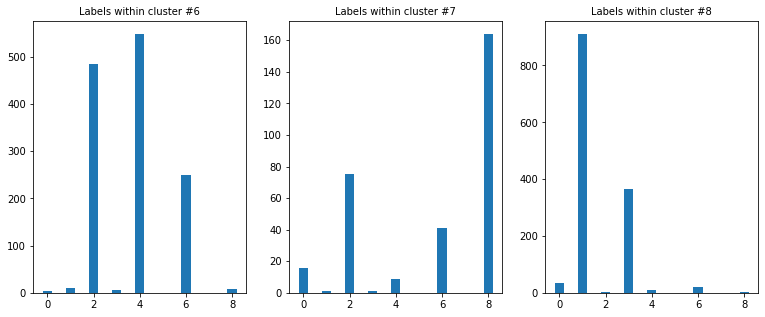

In [17]:
num_clust = 6
num_clust1 = 7
num_clust2 = 8

clusterL= []
clusterL1= []
clusterL2= []

for i in clustLL[num_clust]: 
    clusterL.append(yn[i,0])
for i in clustLL[num_clust1]: 
    clusterL1.append(yn[i,0])
for i in clustLL[num_clust2]: 
    clusterL2.append(yn[i,0])

plt.figure(figsize=(13,5))
plt.subplot(131),plt.hist(clusterL, bins=range(10), rwidth=0.4, align='left'),plt.title('Labels within cluster #{}'.format(num_clust), fontsize=10)
plt.subplot(132),plt.hist(clusterL1, bins=range(10), rwidth=0.4, align='left'),plt.title('Labels within cluster #{}'.format(num_clust1), fontsize=10)
plt.subplot(133),plt.hist(clusterL2, bins=range(10), rwidth=0.4, align='left'),plt.title('Labels within cluster #{}'.format(num_clust2), fontsize=10)
plt.show()

## Without PCA With Kmeans

## Further experiments:
#### - Perform different clusterings varying internal parameters (PCA, K-Means, and Hierarchical clustering).

#### - How can you compare the quality of the resulting clusters? Try to propose and to implement objective measures for that.

In [21]:
start_time = time.process_time()
target_nb_clusts = 100
# COMPLETE THE CODE HERE...
k_means = KMeans(target_nb_clusts)
k_means.fit(Xn)
nb_clusts = k_means.cluster_centers_.shape[0]
# nb_clusts1 = k_means.cluster_centers_.shape[1]

print("The numbers of k-means resulting clusters is ", nb_clusts)
execution_time = time.process_time() - start_time
print(f'duration: {execution_time} seconds')

The numbers of k-means resulting clusters is  100
duration: 90.00017698700003 seconds


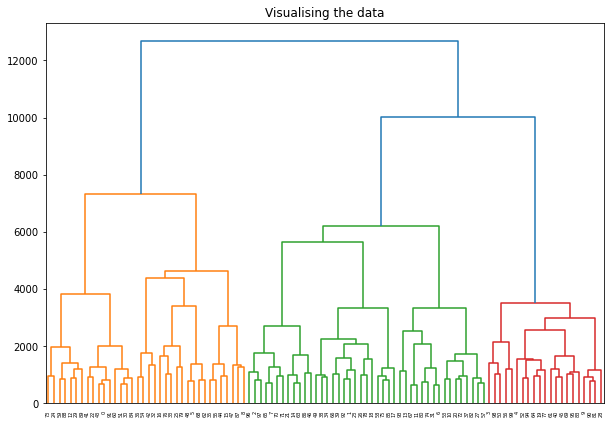

In [22]:
centroids_after_kmeans = k_means.cluster_centers_
# COMPLETE THE CODE HERE...
plt.figure(figsize=(10, 7))
plt.title("Visualising the data")
Dendrogram = sch.dendrogram((sch.linkage(centroids_after_kmeans, method ='ward',optimal_ordering=True)))

In [24]:
from statistics import mean
from collections import Counter

pur_cluster_list = []


for j in range(10) :
  num_clust = j
  cluster_class = []

  for i in clustLL[num_clust] : 
    cluster_class.append(yn[i,0])

  count = Counter(cluster_class)
  pur_cluster =  max(count.values())/ sum(count.values())
  pur_cluster_list.append(pur_cluster)

print(pur_cluster_list)
pur_mean = mean(pur_cluster_list)
print("degree de purete",pur_mean)

[0.9602272727272727, 0.9302949061662198, 0.7395626242544732, 0.49790544584081387, 0.9631728045325779, 0.2564102564102564, 0.41928079571537874, 0.5342019543973942, 0.6778273809523809, 0.32903981264637]
degree de purete 0.6307923253643137


...

### PCA on Kmeans On

In [25]:
start_time = time.process_time()
target_nb_clusts = 100
# COMPLETE THE CODE HERE...
k_means = KMeans(target_nb_clusts)
k_means.fit(Xn_r)
nb_clusts = k_means.cluster_centers_.shape[0]
# nb_clusts1 = k_means.cluster_centers_.shape[1]

print("The numbers of k-means resulting clusters is ", nb_clusts)
execution_time = time.process_time() - start_time
print(f'duration: {execution_time} seconds')

The numbers of k-means resulting clusters is  100
duration: 27.973191917999998 seconds


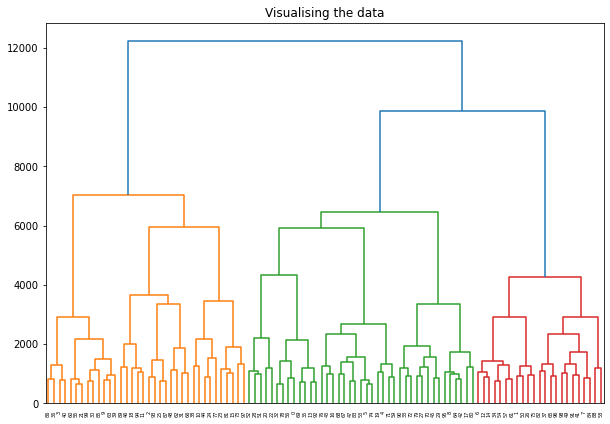

In [27]:
centroids_after_kmeans = k_means.cluster_centers_
# COMPLETE THE CODE HERE...
plt.figure(figsize=(10, 7))
plt.title("Visualising the data")
Dendrogram = sch.dendrogram((sch.linkage(centroids_after_kmeans, method ='ward',optimal_ordering=True)))

In [26]:
pur_cluster_list = []


for j in range(10) :
  num_clust = j
  cluster_class = []

  for i in clustLL[num_clust] : 
    cluster_class.append(yn[i,0])

  count = Counter(cluster_class)
  pur_cluster =  max(count.values())/ sum(count.values())
  pur_cluster_list.append(pur_cluster)

print(pur_cluster_list)
pur_mean = mean(pur_cluster_list)
print("degree de purete",pur_mean)

[0.9602272727272727, 0.9302949061662198, 0.7395626242544732, 0.49790544584081387, 0.9631728045325779, 0.2564102564102564, 0.41928079571537874, 0.5342019543973942, 0.6778273809523809, 0.32903981264637]
degree de purete 0.6307923253643137


pur_cluster_list = []


for j in range(10) :
  num_clust = j
  cluster_class = []

  for i in clustLL[num_clust] : 
    cluster_class.append(yn[i,0])

  count = Counter(cluster_class)
  pur_cluster =  max(count.values())/ sum(count.values())
  pur_cluster_list.append(pur_cluster)

print(pur_cluster_list)
pur_mean = mean(pur_cluster_list)
print("degree de purete",pur_mean)

## Your final report here:

# Hierarchical clustering

- The hierarchical clustering in our case is of type AGGLOMERATIVE (from bottom to top) the latter has allowed to partition the k centroids of the k clusters in 10.



- The dendrogram demonstrates the partitioning of the k centroids according to the distances between the clusters to obtain 10 clusters we cut the dendrogram to a level of 11000. 

- By generating the histogram we notice that we find the number of components following the classes as in the Xn matrix at the very beginning of the TP.

For the other different Combinations , ### With pca and kmeans on :
#### The pca doesn't has a direct impact on the purete , soemtimes it grows or get low,